In [38]:
import matplotlib.pyplot as plt
import os
import json

log_data_base_dir="/mnt/nvme2/xuhaiyang/szz/DPBloom_filter/log_data"
# name="diff_m"
# lengend_name = "log2m"

name="diff_k"
lengend_name="k"

# name="diff_n"
# lengend_name="n"

target_key = "random"
target_key = "inside"
# target_key = "outside"

target_key_mapping = {
    "random" : "Random",
    "inside" : "True_Negative",
    "outside" : "False_Positive"
}

title_mapping = {
    "random" : "Total Error",
    "inside" : "True Negative Error",
    "outside" : "False Positive Error"
}

save_file_name=f"{name}_{target_key_mapping[target_key]}"
title_name = f"{name} {title_mapping[target_key]}"

print(title_name)

log2m=20
n="1e5"
k=8

log_data_dir=os.path.join(log_data_base_dir, name)
# log2m_values = [12, 16, 20, 24, 28]
# log2m_values = [20, 24, 28]
# log2m_values = [18, 19, 20, 21, 22]
log2m_values = [20, 21, 22, 23, 24]
# n_values = ["1e3", "1e4", "1e5", "1e6", "1e7"]
n_values = ["1e1", "1e2", "1e3", "1e4", "1e5"]
# k_values = [2, 4, 8, 16, 32]
k_values = [1, 2, 4, 8, 16]

diff_value2list_dict = {}

# key_list = n_values
# for n in n_values:
#     dict_key = n

key_list = k_values
for k in k_values:
    dict_key = k

# key_list = log2m_values
# for log2m in log2m_values:
#     dict_key = log2m

    value_list = []
    for eps_0 in range(21):
        file_name = f"log2m_{log2m}_n_{n}_k_{k}_eps0_{eps_0}.json"
        file_path = os.path.join(log_data_dir, file_name)
        with open(file_path, 'r') as fr:
            data = json.load(fr)
            value_list.append(data[target_key])
    # post process value list
    # value_list = [value / 100 for value in value_list]
    diff_value2list_dict[dict_key] = value_list



diff_k True Negative Error


In [39]:
for i in range(21):
    for key in key_list:
        print(f"{diff_value2list_dict[key][i]:.5f}%", end="\t")
        # print("%.3f%" % (diff_value2list_dict[key][i]), end=" ")
    print()

50.10700%	75.16600%	93.97600%	99.64700%	99.99800%	
26.93700%	46.50100%	71.65600%	91.76300%	99.32900%	
11.85500%	22.49600%	39.90000%	63.70400%	86.85900%	
4.86100%	9.31700%	17.71000%	32.13600%	54.18500%	
1.86100%	3.58100%	6.98400%	13.45500%	25.26600%	
0.67800%	1.35000%	2.65900%	5.22400%	10.26100%	
0.23900%	0.48400%	0.95200%	1.90800%	3.84300%	
0.08200%	0.17800%	0.34800%	0.72300%	1.43600%	
0.03600%	0.07800%	0.15300%	0.29200%	0.55100%	
0.01600%	0.03000%	0.04400%	0.09800%	0.17900%	
0.00400%	0.00900%	0.01000%	0.02400%	0.04700%	
0.00000%	0.00300%	0.00400%	0.00900%	0.01400%	
0.00000%	0.00000%	0.00000%	0.00300%	0.00500%	
0.00000%	0.00000%	0.00000%	0.00200%	0.00300%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	
0.00000%	0.00000%	0.00000%	0.00000%	0.00000%	


pdfs/diff_n_Random.pdf


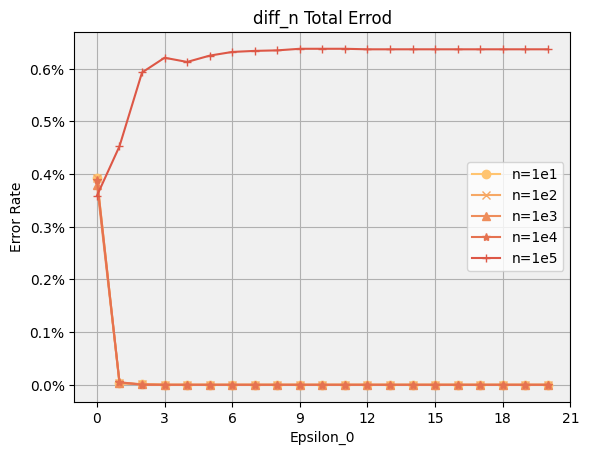

In [82]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker

# 创建一个新的 figure
plt.figure()
# 获取当前坐标轴
ax = plt.gca()
# 设置坐标轴区域颜色为浅灰色
ax.set_facecolor('#f0f0f0')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))


color_list = ["#ffc470", "#f6a865", "#ee8d5b", "#e57250", "#dd5746"]
marker_list = ["o", "x", "^", "*", "+"]


x_data = list(range(21))
for i, key in enumerate(key_list):
    y_data = diff_value2list_dict[key]
    plt.plot(x_data, y_data, label=f"{lengend_name}={key}", marker=marker_list[i], color=color_list[i])

plt.grid(True)  # 显示网格
# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title(title_name)
plt.xlabel('Epsilon_0')
plt.ylabel('Error Rate')

# 显示图形
# plt.show()

save_fig_path = os.path.join("pdfs", f"{save_file_name}.pdf")
print(save_fig_path)
plt.savefig(save_fig_path, format='pdf', bbox_inches='tight', pad_inches=0.05)



(221, 87, 70)
(229, 114, 80)
(238, 141, 91)
(246, 168, 101)
(255, 196, 112)


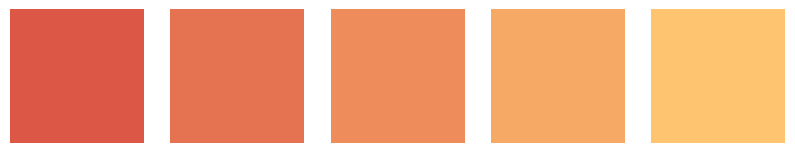

In [13]:
import matplotlib.pyplot as plt

def hex_to_rgb(hex_color):
    """Convert hex color to RGB."""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def interpolate_colors(start_color, end_color, steps):
    """Interpolate between two colors."""
    # Convert hex colors to RGB
    start_rgb = hex_to_rgb(start_color)
    end_rgb = hex_to_rgb(end_color)

    # Calculate the interpolation steps for each channel
    r_steps = (end_rgb[0] - start_rgb[0]) / (steps - 1)
    g_steps = (end_rgb[1] - start_rgb[1]) / (steps - 1)
    b_steps = (end_rgb[2] - start_rgb[2]) / (steps - 1)

    # Generate the interpolated colors
    interpolated_colors = []
    for i in range(steps):
        interpolated_r = start_rgb[0] + r_steps * i
        interpolated_g = start_rgb[1] + g_steps * i
        interpolated_b = start_rgb[2] + b_steps * i
        interpolated_colors.append((int(interpolated_r), int(interpolated_g), int(interpolated_b)))

    return interpolated_colors

# Initial and final hex colors
start_hex = "#DD5746"
end_hex = "#FFC470"

# Number of interpolation steps
steps = 5

# Get the interpolated colors
interpolated_colors = interpolate_colors(start_hex, end_hex, steps)

# Visualize the colors using matplotlib
plt.figure(figsize=(10, 2))
for i, color in enumerate(interpolated_colors, start=1):
    plt.subplot(1, steps, i)  # 1 row, 'steps' columns, the 'i'-th subplot
    print(color)
    plt.imshow([[color]])  # Display a single color patch
    plt.axis('off')  # Turn off axis

plt.show()


In [14]:
def rgb_to_hex(rgb):
    hex = '#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2])
    return hex

for color in interpolated_colors:
    print(rgb_to_hex(color))

#dd5746
#e57250
#ee8d5b
#f6a865
#ffc470
